# Do Not Delete!

In [1]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [2]:
# DO NOT REMOVE This
%reload_ext autoreload

In [3]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

ModuleNotFoundError: No module named 'src'

In [4]:
fis.test_base()

NameError: name 'fis' is not defined

# Import Libraries

In [32]:
# !pip install imblearn

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Resampling Methods
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model Tuning and Cross Validation
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

# Model metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve



# Functions

In [6]:
def make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 

    RU = RandomUnderSampler(random_state=10)

    pipe = make_pipeline(RU, classifier)
    model = pipe.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

# print scores  
    print('Train Accuracy: ' + str(metrics.accuracy_score(y_train, train_predictions)))
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
 
    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

    return model


# Start with clean data

In [8]:
df_cleaned = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
df_cleaned_scaled = pd.read_csv('../data/processed/cleaned_dataframe_scaled.csv.gz', compression='gzip')

## Train-Test Split (without scaling)

In [15]:
X = df_cleaned.drop(['Class'], axis=1)
y = df_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print("No. of samples in each training set:", X_train.shape[0])
print("No. of samples in each test set:", X_test.shape[0])

No. of samples in each training set: 198608
No. of samples in each test set: 85118


## Train-Test Split (with scaling)

In [10]:
X = df_cleaned_scaled.drop(['Class'], axis=1)
y = df_cleaned_scaled['Class']

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

## Gaussian Bayes

Train Accuracy: 0.9495287198904374
Train Precision: 0.028045574057843997
Train Recall: 0.8700906344410876
Train F1: 0.05433962264150943


Test Accuracy: 0.9498460960078949
Test Precision: 0.027911233127430792
Test Recall: 0.8591549295774648
Test F1: 0.05406603146465765


Confusion Matrix: 
TN: 80727 FP: 4249 FN: 20 TP: 122


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

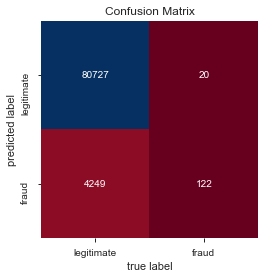

In [18]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, GaussianNB())

## KNN

Train Accuracy: 0.981279706759043
Train Precision: 0.07503136762860728
Train Recall: 0.9033232628398792
Train F1: 0.13855421686746988


Test Accuracy: 0.9821306891609295
Test Precision: 0.0756923076923077
Test Recall: 0.8661971830985915
Test F1: 0.13921901528013583


Confusion Matrix: 
TN: 83474 FP: 1502 FN: 19 TP: 123


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=9, p=2,
                                      weights='uniform'))],
         verbose=False)

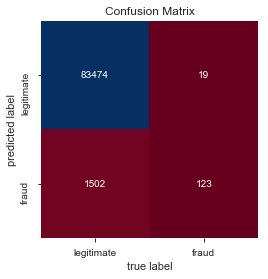

In [17]:
make_RandomUnderSampler_model(X_train_sc, y_train_sc, X_test_sc, y_test_sc, KNeighborsClassifier(n_neighbors=9))

## SVM

[LibSVM]Train Accuracy: 0.9370871263997422
Train Precision: 0.02469521725539231
Train Recall: 0.9546827794561934
Train F1: 0.04814504456463777


Test Accuracy: 0.9368993632369181
Test Precision: 0.023510114816839803
Test Recall: 0.9084507042253521
Test F1: 0.04583407354769941


Confusion Matrix: 
TN: 79618 FP: 5358 FN: 13 TP: 129


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight={0: 1, 1: 2},
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=True))],
         verbose=False)

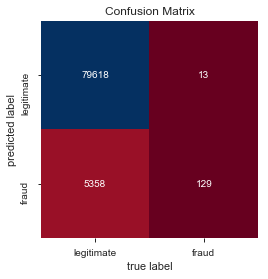

In [21]:
X_train_sv = X_train_sc.values
y_train_sv = y_train_sc.values.ravel()
X_test_sv = X_test_sc.values
y_test_sv = y_test_sc.values.ravel()

make_RandomUnderSampler_model(X_train_sv, y_train_sv, X_test_sv, y_test_sv, SVC(kernel = 'linear', probability = True, class_weight={0: 1, 1: 2}, verbose=True))

## Logistic Regression

Train Accuracy: 0.9193134214130347
Train Precision: 0.01970865467009426
Train Recall: 0.972809667673716
Train F1: 0.03863459115723799


Test Accuracy: 0.9193590074954768
Test Precision: 0.01834336486099169
Test Recall: 0.9014084507042254
Test F1: 0.035955056179775284


Confusion Matrix: 
TN: 78126 FP: 6850 FN: 14 TP: 128


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('logisticregression',
                 LogisticRegression(C=1000000000000.0,
                                    class_weight={0: 1, 1: 3}, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

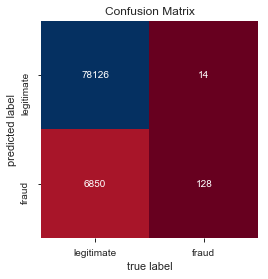

In [23]:
make_RandomUnderSampler_model(X_train_sc, y_train_sc, X_test_sc, y_test_sc, LogisticRegression(fit_intercept = False, C = 1e12, class_weight={0: 1, 1: 3}))

## Random Forest

Train Accuracy: 0.9828053250624346
Train Precision: 0.08836091831286706
Train Recall: 1.0
Train F1: 0.16237429482462595


Test Accuracy: 0.983129302850161
Test Precision: 0.07767624020887728
Test Recall: 0.8380281690140845
Test F1: 0.14217443249701314


Confusion Matrix: 
TN: 83563 FP: 1413 FN: 23 TP: 119


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={0: 1, 1: 3},
                                        criterion='gini', max_depth=12,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=30, n_jobs=None,
                    

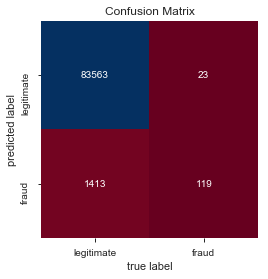

In [26]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, RandomForestClassifier(max_depth=12, n_estimators=30, class_weight={0: 1, 1: 3}))



# AdaBoost

Train Accuracy: 0.9494078788367034
Train Precision: 0.03189131900953849
Train Recall: 1.0
Train F1: 0.061811391223155925


Test Accuracy: 0.9506332385629361
Test Precision: 0.02812645281264528
Test Recall: 0.852112676056338
Test F1: 0.054455445544554455


Confusion Matrix: 
TN: 80795 FP: 4181 FN: 21 TP: 121


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=None))],
         verbose=False)

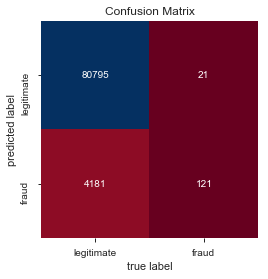

In [28]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, AdaBoostClassifier())



# Gradient Boosting

Train Accuracy: 0.9639490856360268
Train Precision: 0.04272130708450515
Train Recall: 0.9637462235649547
Train F1: 0.08181585021800462


Test Accuracy: 0.964026410394981
Test Precision: 0.039141414141414144
Test Recall: 0.8732394366197183
Test F1: 0.07492447129909366


Confusion Matrix: 
TN: 81932 FP: 3044 FN: 18 TP: 124


Pipeline(memory=None,
         steps=[('randomundersampler',
                 RandomUnderSampler(random_state=10, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                         

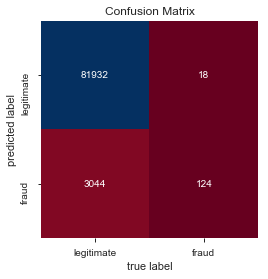

In [31]:
make_RandomUnderSampler_model(X_train, y_train, X_test, y_test, GradientBoostingClassifier(n_estimators=30))